### Lecture 9 and 10: Thyroid Example

### Setup imports

In [1]:
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### Load data

In [3]:
thyroid_df = pd.read_csv('thyroid_data.csv')

thyroid_df.shape

(383, 17)

In [4]:
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

### One hot encode the categorical columns

In [6]:
# define a list of columns to not one hot encode
cols_to_exclude = ['Age', 'Recurred']

# make a list of cols to one hot encode
categorical_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]

categorical_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

### Define the column transformer

In [7]:
column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

### Apply the transformation

In [8]:
transformed_data = column_transformer.fit_transform(thyroid_df)

transformed_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [ ]:
# get the encoded column names
encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out()

# convert to list
encoded_cols = list(encoded_cols)

# add the passed through column names
encoded_cols.append('Age')
encoded_cols.append('Recurred')

encoded_cols

['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [14]:
# convert to dataframe
transformed_df = pd.DataFrame(transformed_data, columns=encoded_cols)

transformed_df

,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,Thyroid Function_Clinical Hypothyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Age,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


### Separate ML input and output

In [18]:
X = transformed_df.drop('Recurred', axis=1)
y = transformed_df['Recurred']

X.head()
y

0       No
1       No
2       No
3       No
4       No
      ... 
378    Yes
379    Yes
380    Yes
381    Yes
382    Yes
Name: Recurred, Length: 383, dtype: str

### Train-test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

X_train.shape

(283, 55)

### Define the hyperparameter grid (random forest)
This will need to be different for k-nearest neighbors

In [20]:
hyperparam_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt', 'log2'],
    'n_estimators': [30,  60, 90]
}

### Define the model and run grid search

In [ ]:
# define the classifier
rf_classifier = RandomForestClassifier()

# define the grid search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=hyperparam_grid, cv=2)

In [22]:
# run the grid search
grid_search.fit(X_train, y_train)

# get the best hyperparameters
best_hyperparams = grid_search.best_params_

best_hyperparams

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 60}

### Make a final model and evaluate it

In [ ]:
# use hyperparameters determined by grid search
final_model = RandomForestClassifier(
    criterion='entropy',
    max_depth=8,
    max_features='sqrt',
    n_estimators=60,
)

# train the final model
final_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",60
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'entropy'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [24]:
# generate test set predictions
y_pred = final_model.predict(X_test)

y_pred 

array(['No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'No'], dtype=object)

In [25]:
# compute the accuracy
final_model.score(X_test, y_test)

0.97

### Get and plot feature importances

In [28]:
feature_importances = final_model.feature_importances_

print(feature_importances)
len(feature_importances)


[1.25955292e-02 1.38954661e-02 3.89715845e-03 4.39183163e-03
 2.27906517e-03 3.08066005e-03 9.53354339e-04 0.00000000e+00
 3.02981666e-03 3.71063011e-04 5.96290705e-03 0.00000000e+00
 3.03539304e-03 1.89727558e-05 9.91542749e-03 1.66007670e-04
 8.54685890e-03 5.34185539e-03 7.54121377e-03 1.08926197e-03
 5.02188002e-03 5.92723791e-02 2.33192632e-04 6.01389992e-03
 3.68308065e-03 1.95359057e-03 2.16462477e-03 4.68380959e-03
 1.15089605e-02 2.09708971e-02 2.97471648e-02 2.20934194e-02
 7.22322968e-02 2.01621006e-03 6.51573845e-03 1.38279079e-02
 9.70008739e-03 1.31725063e-02 5.94604538e-03 1.44132709e-03
 6.23763980e-02 8.42735993e-03 3.12205054e-02 8.39151164e-03
 4.76244794e-03 2.75949194e-02 7.13777018e-03 6.21863025e-04
 7.63108062e-04 1.39676040e-03 1.70961070e-02 1.21977709e-01
 3.47812047e-02 2.46108305e-01 4.90331690e-02]


55

In [29]:
# convert to a dataframe
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df

,feature,importance
0,Gender_F,0.012596
1,Gender_M,0.013895
2,Smoking_No,0.003897
3,Smoking_Yes,0.004392
4,Hx Smoking_No,0.002279
5,Hx Smoking_Yes,0.003081
6,Hx Radiothreapy_No,0.000953
7,Hx Radiothreapy_Yes,0.000000
8,Thyroid Function_Clinical Hyperthyroidism,0.003030
9,Thyroid Function_Clinical Hypothyroidism,0.000371


<Axes: xlabel='feature'>

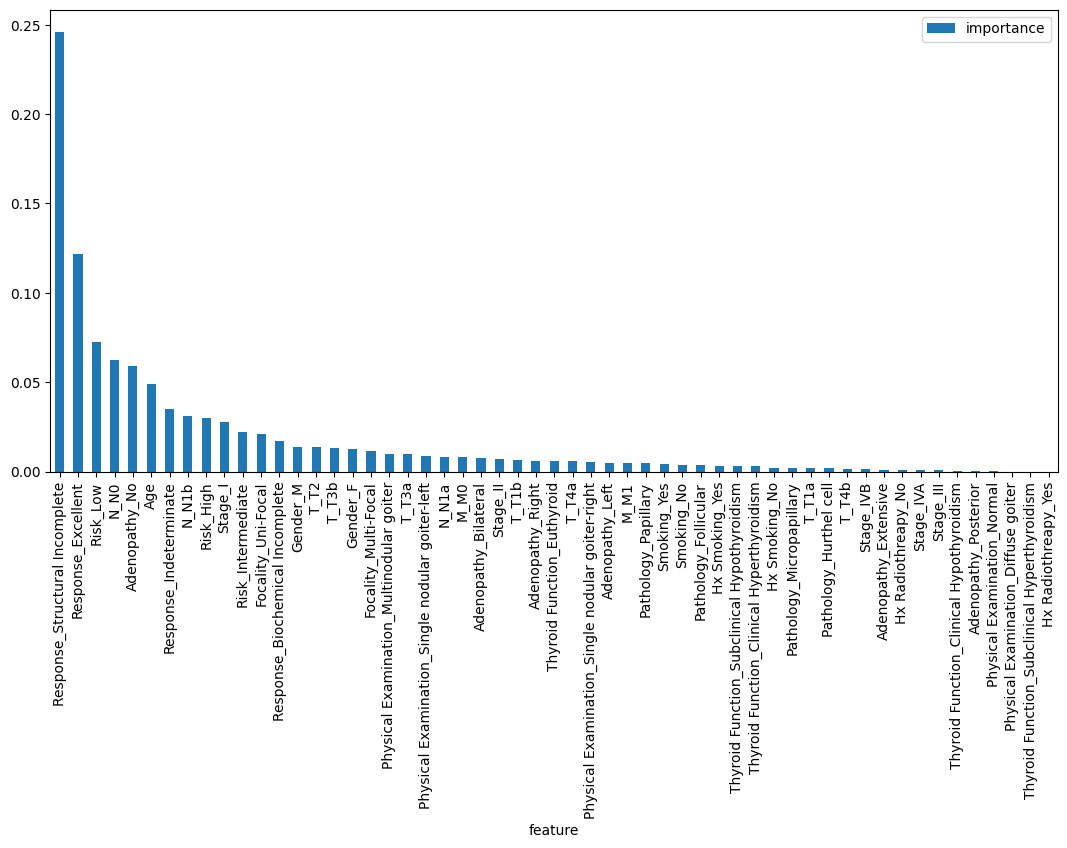

In [33]:
# sort the dataframe
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# make a bar plot
feature_importance_df.plot.bar(x='feature',  y='importance', figsize=(13, 6))

### Import the K neighbors classifier

### Set up hyperparameter grid
Try different options for: 
n_neighbors, 
weights, 
algorithm

### Run grid search to get best params

### Train model with best params

### Evaluate the accuracy of the model